### Intelligent Algorithmic Trading
# Paper Title

<hr>
For further details visit our <a href='https://github.com/achmand/ari5123_assignment' target="_blank">GitHub Repository</a>

### Table of Contents

## Introduction

### Importing Dependencies 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import lucrum.algo as algo
import matplotlib.pyplot as plt
import lucrum.datareader as ldr
from ipywidgets import interactive
from collections import OrderedDict
from lucrum.algo import MACrossoverAlgo
from lucrum.algo import BuyHoldStrategy

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Cryptocurrencies Datasets 

In [2]:
# set parameters for importing datasets
data_path = "data/"            # data is stored in data directory 
data_format = ".csv"           # file is saved as .csv format
data_source = "binance"        # Binance API will be used to download data
data_interval = "15m"          # we will be fetching 15m interval data
data_timezone = "Europe/Malta" # timezone used to convert the data timezone from source

# currency pairs which will be investigated in this study
# we will be investigating 6 different cryptocurrencies pairs 
# all of which are against USDT which is considered as a stable coin 

# Bitcoin/Tether    17-08-2017 to 01-06-2019
# Ethereum/Tether   17-08-2017 to 01-06-2019
# Zerps/Tether      04-05-2018 to 01-06-2019
# Litcoin/Tether    13-12-2017 to 01-06-2019
# EOS/Tether        28-05-2018 to 01-06-2019
# Stellar/Tether    31-05-2018 to 01-06-2019
currency_pairs = [("BTCUSDT", "17 Aug, 2017", "1 Jun, 2019"), 
                  ("ETHUSDT", "17 Aug, 2017", "1 Jun, 2019"), 
                  ("XRPUSDT", "4 May, 2018",  "1 Jun, 2019"),  
                  ("LTCUSDT", "13 Dec, 2017", "1 Jun, 2019"),
                  ("EOSUSDT", "28 May, 2018", "1 Jun, 2019"), 
                  ("XLMUSDT", "31 May, 2018", "1 Jun, 2019")] 

# create an ordered dictionary to hold all the data
pairs_dict = OrderedDict()

# check if data exists as .csv, if not found in data path, download the 15m data from Binance API 
# a new module was created in the lucrum library to access API's such as Binance 

# loop in each pair 
for pair in currency_pairs:
    
    # get attributes from pair tuple 
    tmp_pair = pair[0]   # get pair
    tmp_start = pair[1]  # get start date
    tmp_end = pair[2]    # get end date 
    
    # get path from the attributes in the tuple 
    tmp_path = "{0}{1}{2}".format(data_path, tmp_pair, data_format)
    my_file = Path(tmp_path)
    
    # check if path exists 
    if my_file.is_file(): # file exists
        print("{0} file existed, retrieving data from file.".format(tmp_pair))
    
        # load data from path 
        price_history = pd.read_csv(tmp_path)
                
        # convert datetime types
        price_history["open_time"] = pd.to_datetime(price_history["open_time"].str.split("+").str[0])
        price_history["close_time"] = pd.to_datetime(price_history["close_time"].str.split("+").str[0])
        
        # add the dataframe to the dictionary
        pairs_dict[tmp_pair] = price_history
        print(price_history.dtypes)
        
    else: # file does not exist, download data from Binance API
        print("{0} file does not exist, downloading from {1}.".format(tmp_pair, data_source))
        
        # download from source provided, with the details provided
        price_history = ldr.get_data(source=data_source,
                                     symbols=tmp_pair,
                                     start=tmp_start, 
                                     end=tmp_end,
                                     interval=data_interval,
                                     timezone=data_timezone)
        
        # save the dataframe as csv file to the path 
        price_history.to_csv(tmp_path, 
                             index=None, 
                             header=True)
        
        
        # convert datetime types
        price_history["open_time"] = pd.to_datetime(price_history["open_time"].str.split("+").str[0])
        price_history["close_time"] = pd.to_datetime(price_history["close_time"].str.split("+").str[0])
        
        # add the dataframe to the dictionary
        pairs_dict[tmp_pair] = price_history
        print(price_history.dtypes)

BTCUSDT file existed, retrieving data from file.
open_time     datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
close_time    datetime64[ns]
trades                 int64
volume               float64
dtype: object
ETHUSDT file existed, retrieving data from file.
open_time     datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
close_time    datetime64[ns]
trades                 int64
volume               float64
dtype: object
XRPUSDT file existed, retrieving data from file.
open_time     datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
close_time    datetime64[ns]
trades                 int64
volume               float64
dtype: object
LTCUSDT file existed, retrieving data from file.
open_time     datetime64[ns]
open                 float64
high    

### Exploring Cryptocurrency Datasets

Exploring the following dataset: BTCUSDT

Distribution Moments 
	Mean (1st): 0.000011
	STD (2nd): 0.005573
	Skew (3rd): 0.045194
	Kurtosis (4th): 21.390842

Descriptive stats from pandas describe


count    62315.000000
mean         0.000011
std          0.005573
min         -0.078635
25%         -0.001634
50%          0.000022
75%          0.001743
max          0.090803
Name: close, dtype: float64

---------------------------------------------------------
Exploring the following dataset: ETHUSDT

Distribution Moments 
	Mean (1st): -0.000002
	STD (2nd): 0.006652
	Skew (3rd): 0.009216
	Kurtosis (4th): 25.606661

Descriptive stats from pandas describe


count    62315.000000
mean        -0.000002
std          0.006652
min         -0.126609
25%         -0.002244
50%          0.000000
75%          0.002315
max          0.138168
Name: close, dtype: float64

---------------------------------------------------------
Exploring the following dataset: XRPUSDT

Distribution Moments 
	Mean (1st): -0.000020
	STD (2nd): 0.005486
	Skew (3rd): 0.278156
	Kurtosis (4th): 31.207233

Descriptive stats from pandas describe


count    37513.000000
mean        -0.000020
std          0.005486
min         -0.106577
25%         -0.001931
50%         -0.000031
75%          0.001889
max          0.097354
Name: close, dtype: float64

---------------------------------------------------------
Exploring the following dataset: LTCUSDT

Distribution Moments 
	Mean (1st): -0.000018
	STD (2nd): 0.006991
	Skew (3rd): 0.109748
	Kurtosis (4th): 30.928835

Descriptive stats from pandas describe


count    51016.000000
mean        -0.000018
std          0.006991
min         -0.152350
25%         -0.002466
50%          0.000000
75%          0.002401
max          0.136735
Name: close, dtype: float64

---------------------------------------------------------
Exploring the following dataset: EOSUSDT

Distribution Moments 
	Mean (1st): -0.000011
	STD (2nd): 0.005942
	Skew (3rd): -0.623118
	Kurtosis (4th): 32.572065

Descriptive stats from pandas describe


count    35221.000000
mean        -0.000011
std          0.005942
min         -0.147268
25%         -0.002175
50%         -0.000014
75%          0.002147
max          0.080855
Name: close, dtype: float64

---------------------------------------------------------
Exploring the following dataset: XLMUSDT

Distribution Moments 
	Mean (1st): -0.000023
	STD (2nd): 0.005855
	Skew (3rd): 0.125108
	Kurtosis (4th): 16.640248

Descriptive stats from pandas describe


count    34915.000000
mean        -0.000023
std          0.005855
min         -0.077377
25%         -0.002338
50%          0.000000
75%          0.002278
max          0.094950
Name: close, dtype: float64

---------------------------------------------------------
Distribution plots for all the datasets


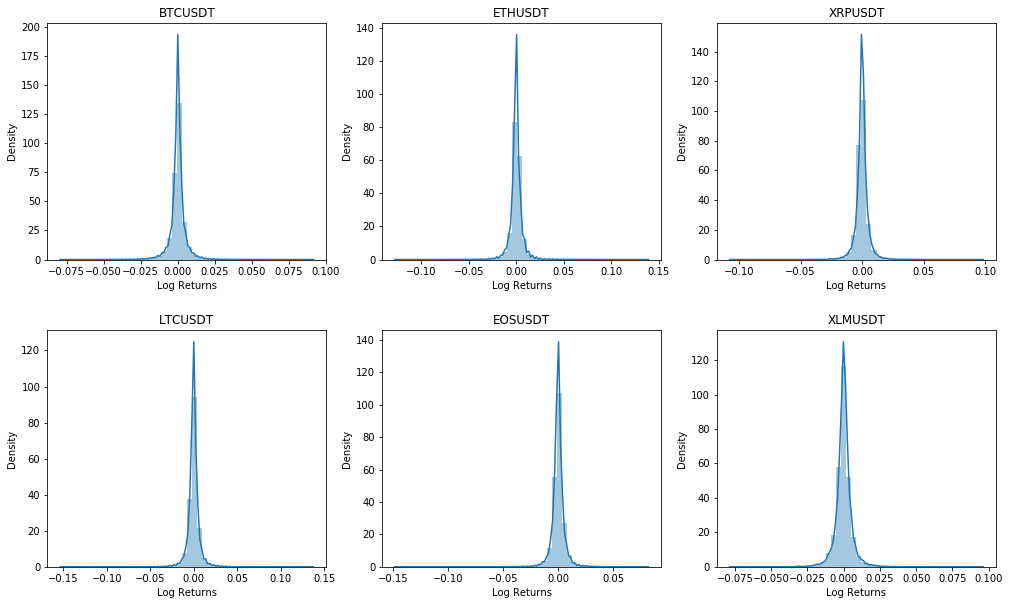

In [3]:
##################################################################
# Explore the underlying distributions for the log returns, 
# and show other descriptive statistics. 
##################################################################

# decimal places 
ndigits = 6

# to plot prob distribution 
i = 1
fig = plt.figure(figsize=(17,10))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

# loop in all the datasets 
for key, value in pairs_dict.items(): 
    
    # explore dataset 
    print("Exploring the following dataset: {}".format(key))
    
    # compute log returns
    tmp_log_returns = np.log(pairs_dict[key].close / pairs_dict[key].close.shift(1))
        
    # drop nan from the shift 1 
    tmp_log_returns.dropna(inplace=True)
    
    # show 4 moments of distribution 
    # - mean: 1st moment 
    # - standard deviation: 2nd moment 
    # - skew: 3rd moment 
    # - kurtosis: 4th moment 
    ds_mean, ds_std, ds_skew, ds_kurtosis = algo.dist_moments(tmp_log_returns)
    
    # print 4 distribution moments
    print("\nDistribution Moments "+
          "\n\tMean (1st): {:.6f}".format(round(ds_mean, ndigits)) +
          "\n\tSTD (2nd): {0}".format(round(ds_std, ndigits)) +
          "\n\tSkew (3rd): {0}".format(round(ds_skew, ndigits)) +
          "\n\tKurtosis (4th): {0}".format(round(ds_kurtosis, ndigits)))
   
    # print other stats from pandas describe
    print("\nDescriptive stats from pandas describe")
    display(tmp_log_returns.describe())
    
    # create subplot
    ax = fig.add_subplot(2, 3, i)
    ax.title.set_text(key)
    ax.set_ylabel("Density")
    ax.set_xlabel("Log Returns")
    sns.distplot(tmp_log_returns.values, ax=ax)
    
    i = i+1
    print("---------------------------------------------------------")

# show plots 
print("Distribution plots for all the datasets")
plt.show()

### Dataset Splitting Function for In Sample and Out of Sample

The function below is used to split the dataset, given that the dataset is ordered by time.

<br>
We will apply the following splits (for all the datasets)

1) split in-sample and out-sample (80:20)

2) re-split the in-sample to train and validation (80:20) 


In [4]:
##################################################################
# Dataset splitting function for Train/Validation/Test Splits 
##################################################################

# function to split ordered time series dataset
def split_dataset(data, split_perc):
    """Splits ordered time series pandas dataframe.

    Parameters 
    ----------
    data: pandas dataframe 
        An ordered dataframe (ordered by time ASC).
    split_perc: float
        A float value which specified the percentage of the split, 
        must be between 0 and 1, where 0 and 1 are exclusive. 
        
    Returns  
    -------
    pandas dataframe: 
        A dataframe split with a total of the split_perc (%) specified.
    pandas dataframe: 
        Another dataframe with the remaining date (1 - split_perc (%)).
    
    """
    
    # print date range for total samples before split
    time_from = data.head(1)["open_time"].astype(str).values[0]
    time_to = data.tail(1)["close_time"].astype(str).values[0]
    print("[From {} to {}]".format(time_from, time_to))  
    
    # print total samples before split 
    total_rows = data.shape[0]
    print("Total samples before splitting: {}".format(total_rows))
     
    # caclulcate the total number of rows given it will be 
    # split by the percentage specified 
    first_split_n = int(total_rows * split_perc)
    
    # get splits 
    first_split, second_split = data.iloc[0:first_split_n, :], data.iloc[first_split_n:total_rows, :]
    
    # percentage of split 
    first_perc = round(split_perc * 100, 2)
    
    # print stats for first split 
    time_from = first_split.head(1)["open_time"].astype(str).values[0]
    time_to = first_split.tail(1)["close_time"].astype(str).values[0]
    print("\n[From {} to {} ({}%)]".format(time_from, 
                                           time_to, 
                                           first_perc))  
    
    # print total samples for first split 
    print("Total samples in first split: {} ({}%)".format(first_split.shape[0], first_perc))
    
    # percentage for second split 
    second_perc = 100.00 - first_perc
    
    # print stats for second split 
    time_from = second_split.head(1)["open_time"].astype(str).values[0]
    time_to = second_split.tail(1)["close_time"].astype(str).values[0]
    print("\n[From {} to {} ({}%)]".format(time_from, 
                                           time_to, 
                                           second_perc))  
    
    # print total samples for second split 
    print("Total samples in first split: {} ({}%)".format(second_split.shape[0], second_perc))
    
    # returns both splits 
    return first_split, second_split

In [5]:
##################################################################
# Split the datasets for Train/Validation/Test Splits 
##################################################################

# we will apply the following splits (for all the datasets)
# 1) split in-sample and out-sample (80:20)
# 2) re-split the in-sample to train and validation (80:20) 

split_percentage = 0.80        # for both splits we used 80:20
insample_data = OrderedDict()  # create an ordered dictionary to hold insample
outsample_data = OrderedDict() # create an ordered dictionary to hold insample

# 1) split in-sample and out-sample (80:20)
print("SPLIT INSAMPLE AND OUTSAMPLE DATASETS")
for key, value in pairs_dict.items(): # loop to split all the dataset to in/out samples
    print("-----------------------------------------------------")
    print("Splitting in/out samples for: {} \n".format(key))
    
    # get splits 
    insample_split, outsample_split = split_dataset(pairs_dict[key], split_percentage)
    insample_data[key] = insample_split    # add insample split to insample dictionary 
    outsample_data[key] = outsample_split  # add outsample split to outsample dictionary 
    print("-----------------------------------------------------\n")
    
train_data = OrderedDict()      # create an ordered dictionary to hold training set
validation_data = OrderedDict() # create an ordered dictionary to hold validation set 

# 2) re-split the in-sample to train and validation (80:20) 
print("SPLIT TRAINING AND VALIDATION DATASETS")
for key, value in insample_data.items(): # loop to split all the dataset to train/validation
    print("-----------------------------------------------------")
    print("Splitting train/validation samples for: {} \n".format(key))
    
    # get splits
    training_split, validation_split = split_dataset(insample_data[key], split_percentage)
    train_data[key] = train_data            # add training split to training dictionary 
    validation_data[key] = validation_split # add validation split to validation dictionary
    print("-----------------------------------------------------\n")

SPLIT INSAMPLE AND OUTSAMPLE DATASETS
-----------------------------------------------------
Splitting in/out samples for: BTCUSDT 

[From 2017-08-17 06:00:00 to 2019-06-01 02:14:59.999]
Total samples before splitting: 62316

[From 2017-08-17 06:00:00 to 2019-01-21 13:14:59.999 (80.0%)]
Total samples in first split: 49852 (80.0%)

[From 2019-01-21 13:15:00 to 2019-06-01 02:14:59.999 (20.0%)]
Total samples in first split: 12464 (20.0%)
-----------------------------------------------------

-----------------------------------------------------
Splitting in/out samples for: ETHUSDT 

[From 2017-08-17 06:00:00 to 2019-06-01 02:14:59.999]
Total samples before splitting: 62316

[From 2017-08-17 06:00:00 to 2019-01-21 13:14:59.999 (80.0%)]
Total samples in first split: 49852 (80.0%)

[From 2019-01-21 13:15:00 to 2019-06-01 02:14:59.999 (20.0%)]
Total samples in first split: 12464 (20.0%)
-----------------------------------------------------

----------------------------------------------------

## Baseline Strategies

### Buy and Hold Strategy

This is the simplest method which we will be tested, which is simply buying an asset and holding it through the whole period. For this strategy we assume that one trade have been executed, which is executed on time $t_0$ on the test dataset (when buying the asset for the first time), so we will only apply the trading fee once. 


Applying Buy n Hold strategy for: BTCUSDT

From 2019-01-21 13:15:00 to 2019-06-01 02:14:59.999
Bought at price 3538.51 and current price is 8534.82

Total number of trades: 1
Profit/Loss [Log Return]: 88.04%
Profit/Loss [Simple Return]: 141.2%
Maximum Gain: 92.7%
Maximum Drawdown: -4.99%
Annualised Sharpe Ratio: 4.387922


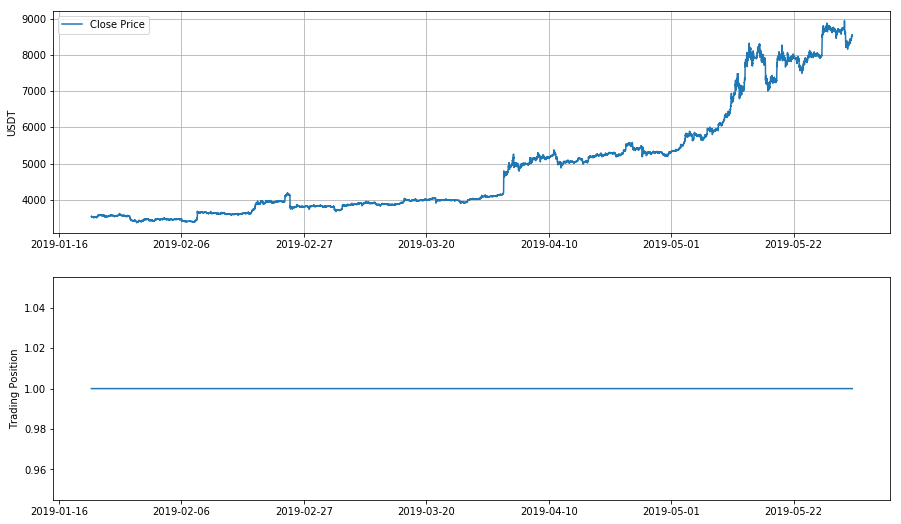

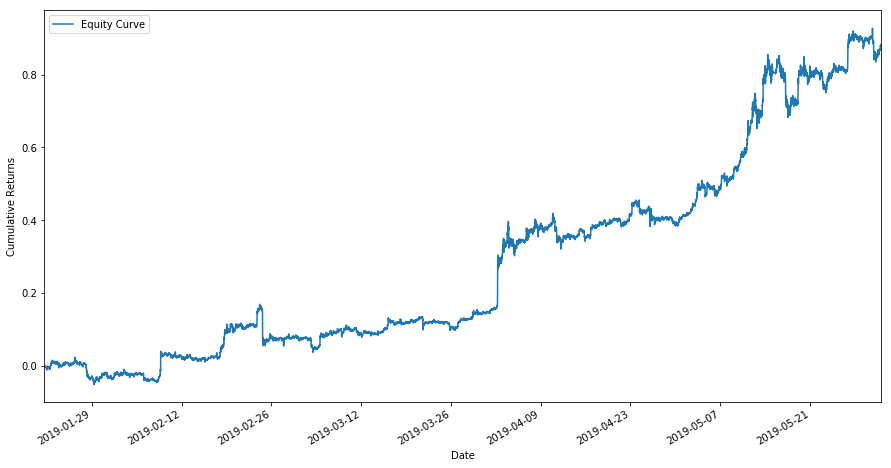

-------------------------------END--------------------------------------------------------

Applying Buy n Hold strategy for: ETHUSDT

From 2019-01-21 13:15:00 to 2019-06-01 02:14:59.999
Bought at price 116.93 and current price is 267.1

Total number of trades: 1
Profit/Loss [Log Return]: 82.6%
Profit/Loss [Simple Return]: 128.43%
Maximum Gain: 89.69%
Maximum Drawdown: -13.48%
Annualised Sharpe Ratio: 2.84115


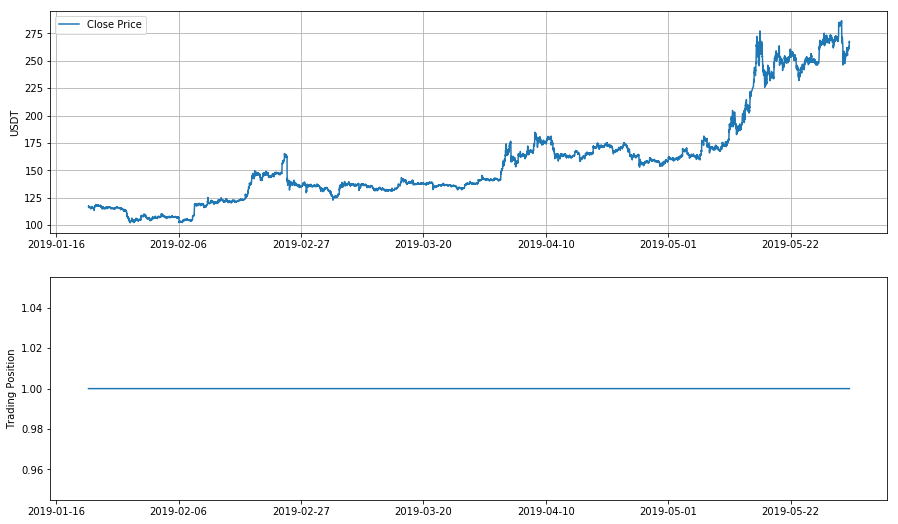

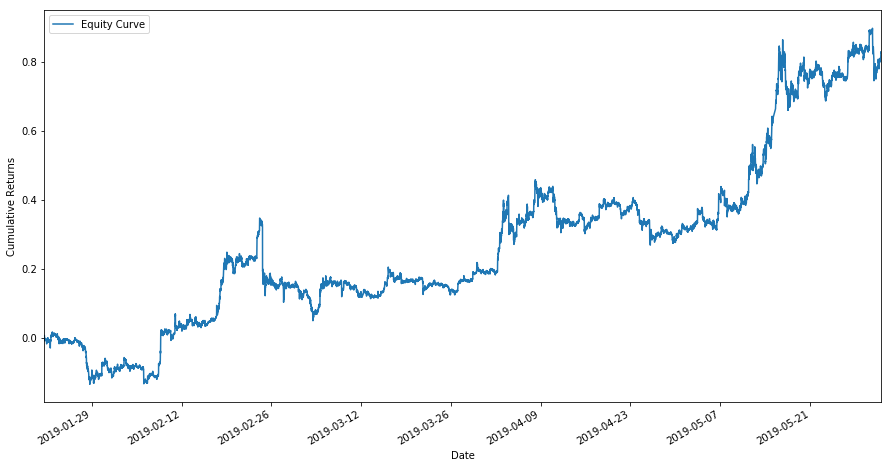

-------------------------------END--------------------------------------------------------

Applying Buy n Hold strategy for: XRPUSDT

From 2019-03-14 11:30:00 to 2019-06-01 02:14:59.999
Bought at price 0.3123 and current price is 0.43688

Total number of trades: 1
Profit/Loss [Log Return]: 33.57%
Profit/Loss [Simple Return]: 39.89%
Maximum Gain: 41.98%
Maximum Drawdown: -7.38%
Annualised Sharpe Ratio: 1.71386


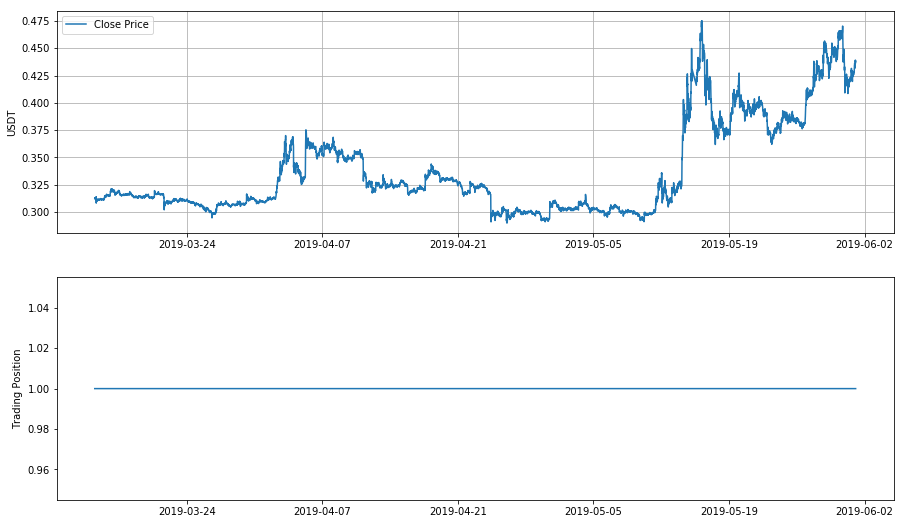

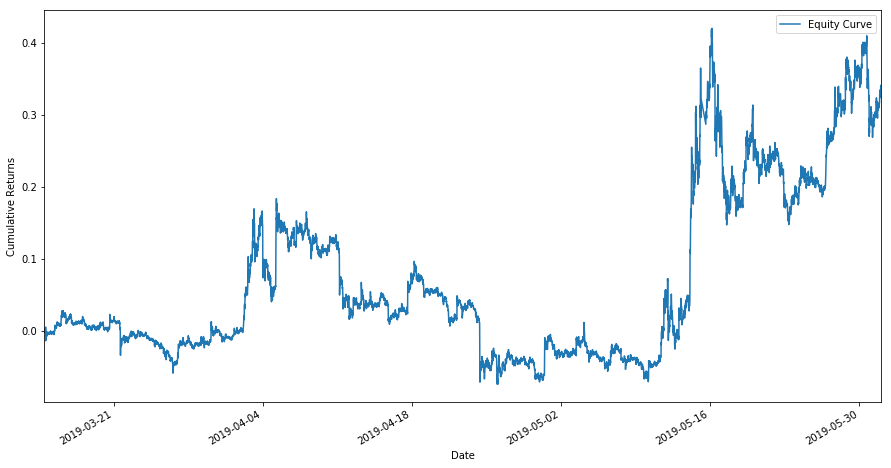

-------------------------------END--------------------------------------------------------

Applying Buy n Hold strategy for: LTCUSDT

From 2019-02-14 02:15:00 to 2019-06-01 02:14:59.999
Bought at price 42.16 and current price is 114.77

Total number of trades: 1
Profit/Loss [Log Return]: 100.15%
Profit/Loss [Simple Return]: 172.23%
Maximum Gain: 104.09%
Maximum Drawdown: -2.99%
Annualised Sharpe Ratio: 3.147806


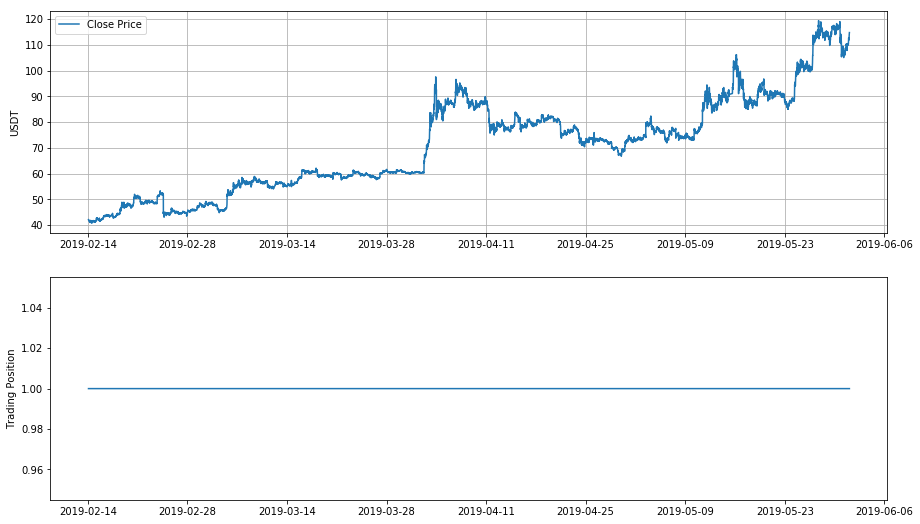

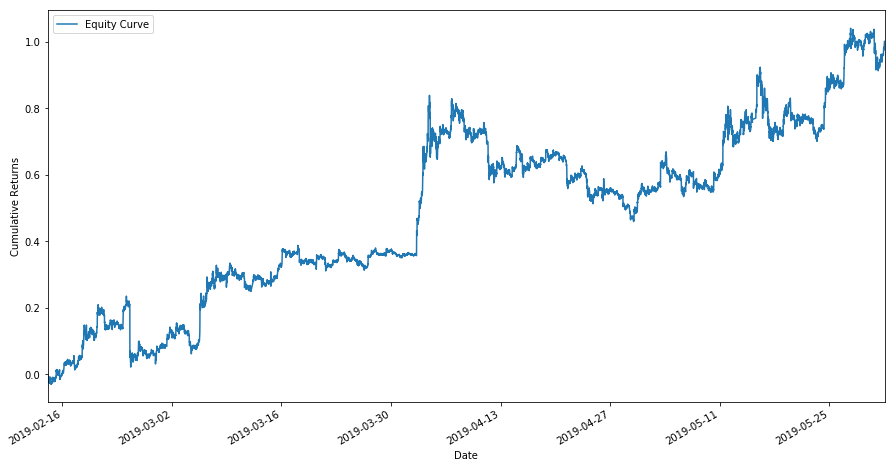

-------------------------------END--------------------------------------------------------

Applying Buy n Hold strategy for: EOSUSDT

From 2019-03-19 06:00:00 to 2019-06-01 02:14:59.999
Bought at price 3.6835 and current price is 8.4798

Total number of trades: 1
Profit/Loss [Log Return]: 83.38%
Profit/Loss [Simple Return]: 130.21%
Maximum Gain: 85.21%
Maximum Drawdown: -4.0%
Annualised Sharpe Ratio: 4.095005


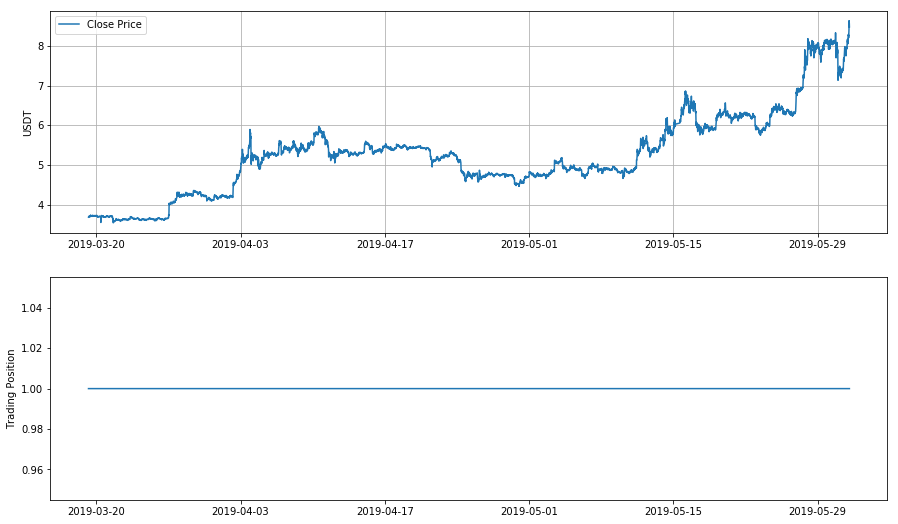

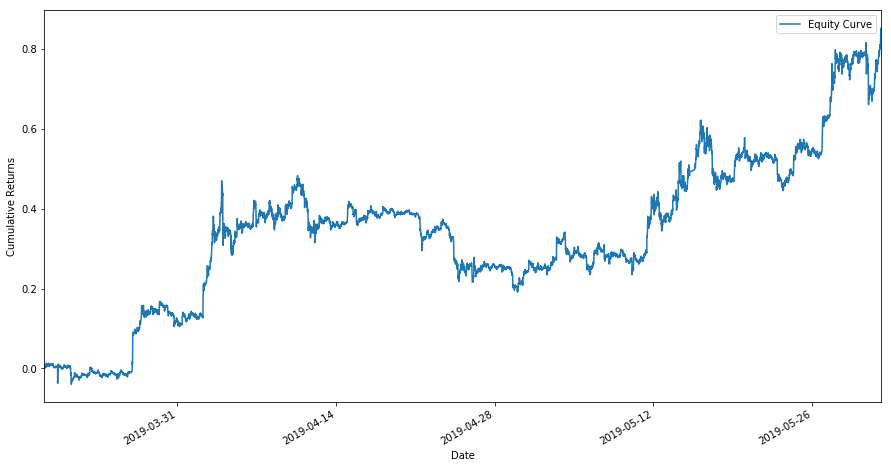

-------------------------------END--------------------------------------------------------

Applying Buy n Hold strategy for: XLMUSDT

From 2019-03-19 21:15:00 to 2019-06-01 02:14:59.999
Bought at price 0.11293 and current price is 0.13271

Total number of trades: 1
Profit/Loss [Log Return]: 16.14%
Profit/Loss [Simple Return]: 17.52%
Maximum Gain: 35.97%
Maximum Drawdown: -25.78%
Annualised Sharpe Ratio: 0.788289


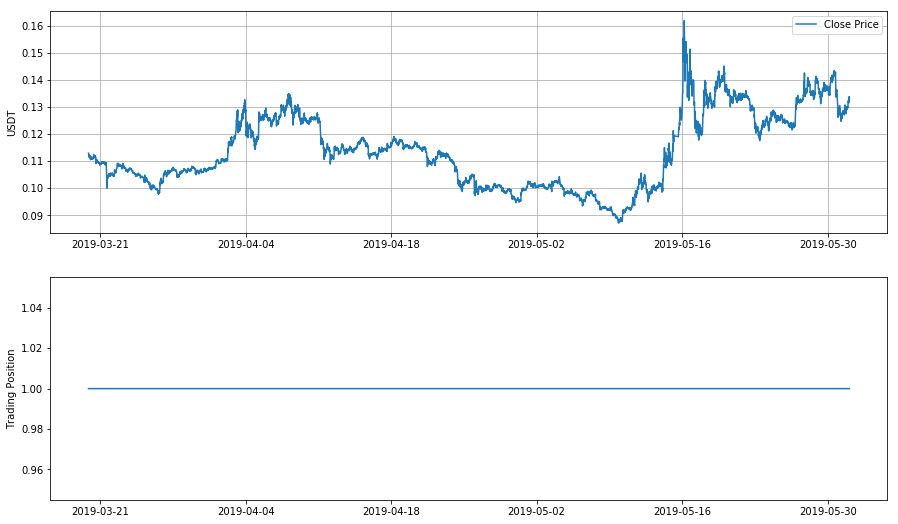

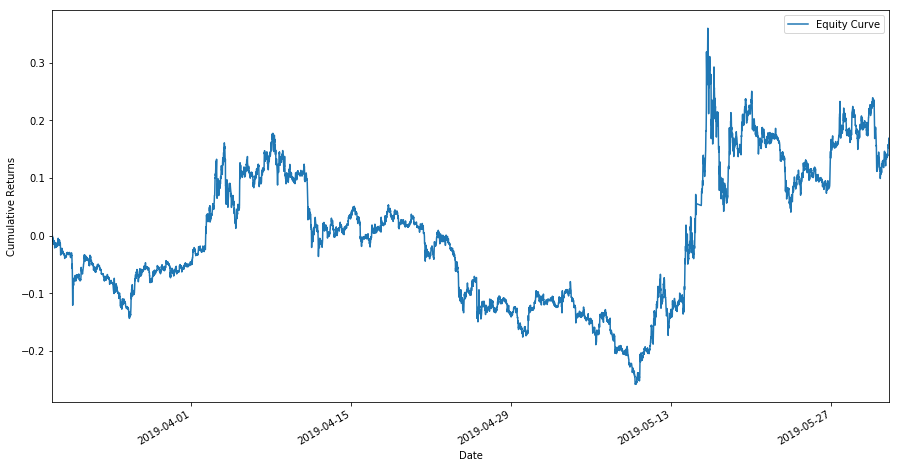

-------------------------------END--------------------------------------------------------


In [6]:
##################################################################
# Buy n Hold Strategy (BASELINE MODEL)
##################################################################

# set fee for each trade (based on Binance Fees as of June 2019)
# General: 0.1% trading fee.
trading_fee = 0.001 # 0.1% per trade executed 

# create a new instance for buy and hold strategy 
buynhold = BuyHoldStrategy()

# loop in all datasets (test sets)
for key, value in outsample_data.items():
    
    # print the pair which is being tested 
    print("\nApplying Buy n Hold strategy for: {}\n".format(key))
    
    # make copy of dataframe 
    current_pair = outsample_data[key].copy()
    
    # generates positions (just one position in this buy n hold)
    buynhold.gen_positions(data=current_pair)
    
    # evaluate buy and hold
    buynhold.evaluate(data=current_pair, trading_fee=trading_fee)
    
    # print performance
    buynhold.stats_perf(data=current_pair)
    
    # set open time as index (for plot)
    current_pair.set_index("open_time", inplace=True)  
    
    # plot positions
    buynhold.plot_pos(data=current_pair)
    
    # plot equity curve 
    buynhold.plot_perf(data=current_pair)
    print("-------------------------------END--------------------------------------------------------")

### Technical Indicators Strategies 

We decided to test out 4 different types of technical indicators. The following are the types of indicators we will be testing: 

1) <b>Trend Indicators</b> 
2) <b>Momentum Indicators</b>
3) <b>Volatility Indicators</b>
4) <b>Volume Indicators</b>

<i>NOTE: Sometimes trend and momentum indicators are use interchangeably, meaning some may refer to trend indicators as momentum indicators and some may refer to momentum indicators as trend indicators.</i>

<i>NOTE: Sometimes volatility and volume indicators are use interchangeably, meaning some may refer to volatility indicators as volume indicators and some may refer to volume indicators as volatility indicators.</i>

For each type we have chosen to investigate the following technical indicators:

1) <b>Trend Indicator</b>
- Short-Window EMA: Exponential Moving Average
- Long-Window EMA: Exponential Moving Average

2) <b>Momentum Indicator</b>
- RSI: Relative Strength Index

3) <b>Volatility Indicator</b>
- ATR: Average True Range

4) <b>Volume Indicator</b>
- OBV: On Balance Volume

So in total we will make use of 6 technical indicators. Now we will test these standard technical indicators strategies, each indicator with it’s own strategy.

#### Exponential Moving Average (Crossover) Strategy 

This strategy which will be applied is one of the most simplest strategies used when using an Exponential Moving Average (EMA) indicator or any other moving average indicator. We take the following positions based on the following rules:

<br>
<i>
If EMA_shortwindow > EMA_longwindow <br>
&ensp;then OpenLongPosition <br>
else <br>
&ensp;OpenShortPosition 
</i>


This strategy is usually referred to as the moving average crossover strategy. 

<i>NOTE: A fee is applied when you get in a long position, exit a long position, get in a short position or exit a short position. Basically a fee is applied per trade.</i>

Tuning EMA strategy using brute force for BTCUSDT
[BEST] Lead(45) / Lag(75)

From 2019-01-21 13:15:00 to 2019-06-01 02:14:59.999 (131 days)

Total number of trades: 293
Avg. trades per day: 2.24
Profit/Loss [Log Return]: 11.45%
Profit/Loss [Simple Return]: 12.13%
Maximum Gain: 18.48%
Maximum Drawdown: -16.03%
Annualised Sharpe Ratio: 0.570926

First 500 poistions taken for: BTCUSDT


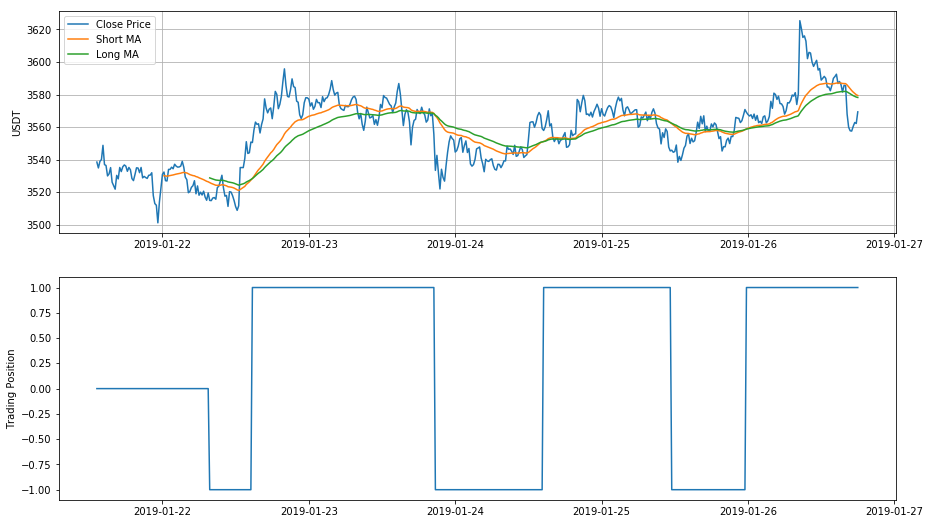

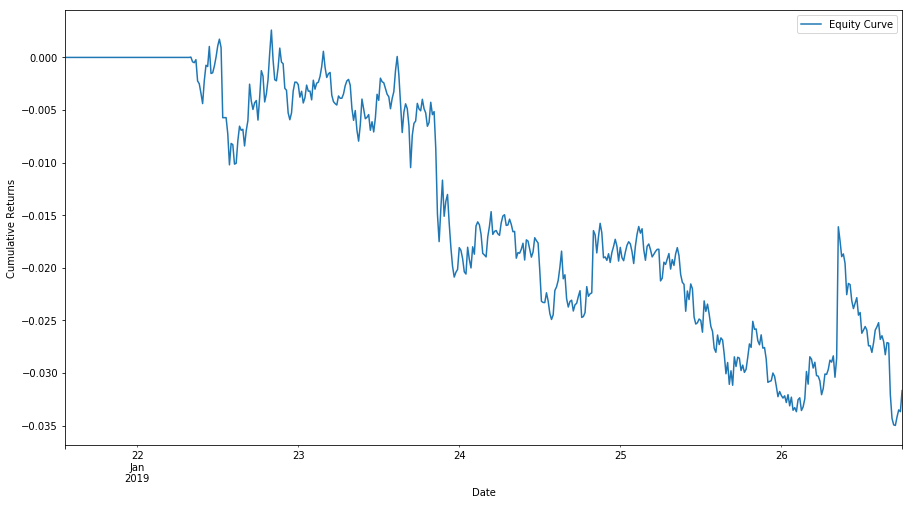

Last 500 poistions taken for: BTCUSDT


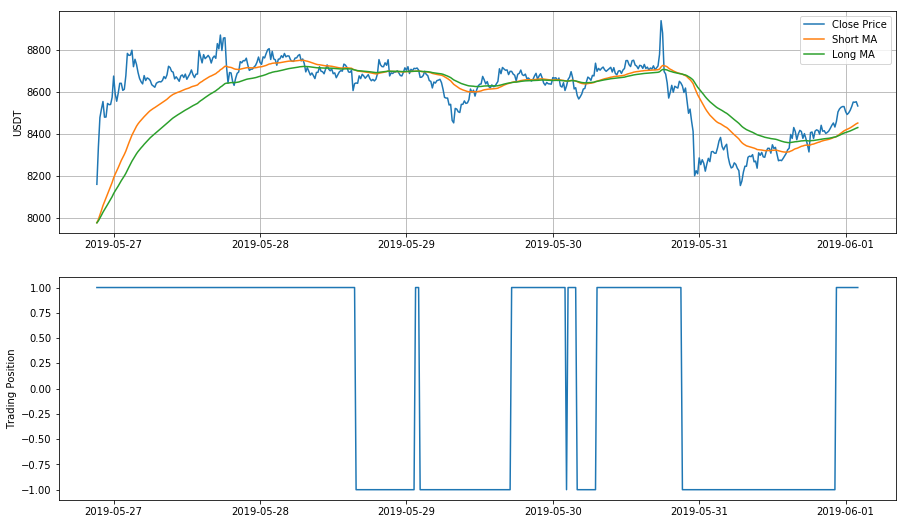

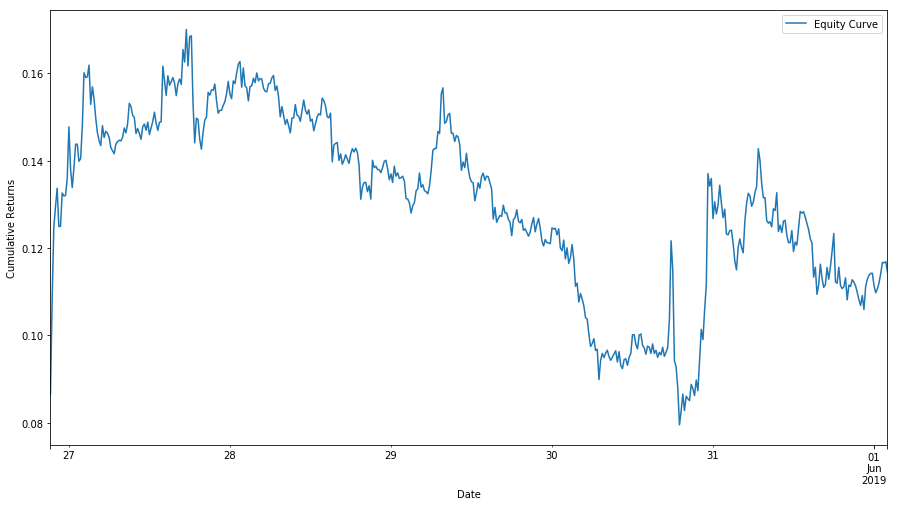

Equity Curve for the whole date range for: BTCUSDT


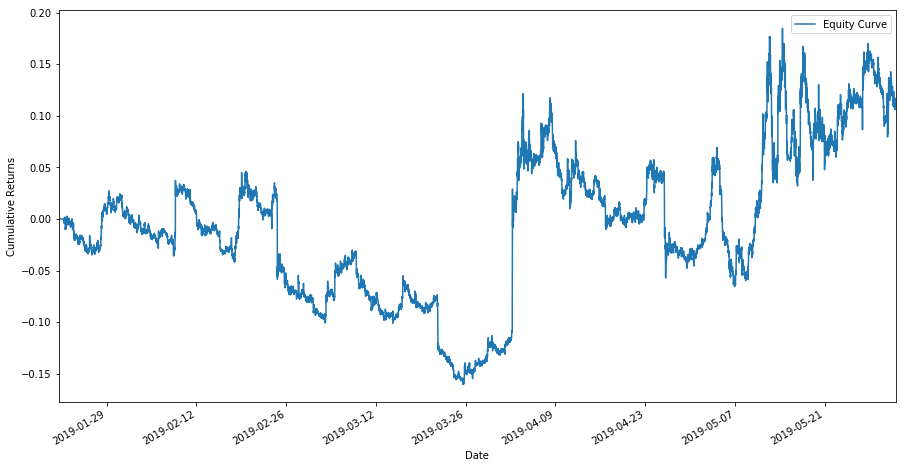

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for ETHUSDT
[BEST] Lead(35) / Lag(75)

From 2019-01-21 13:15:00 to 2019-06-01 02:14:59.999 (131 days)

Total number of trades: 306
Avg. trades per day: 2.34
Profit/Loss [Log Return]: 46.64%
Profit/Loss [Simple Return]: 59.42%
Maximum Gain: 56.84%
Maximum Drawdown: -10.09%
Annualised Sharpe Ratio: 1.605293

First 500 poistions taken for: ETHUSDT


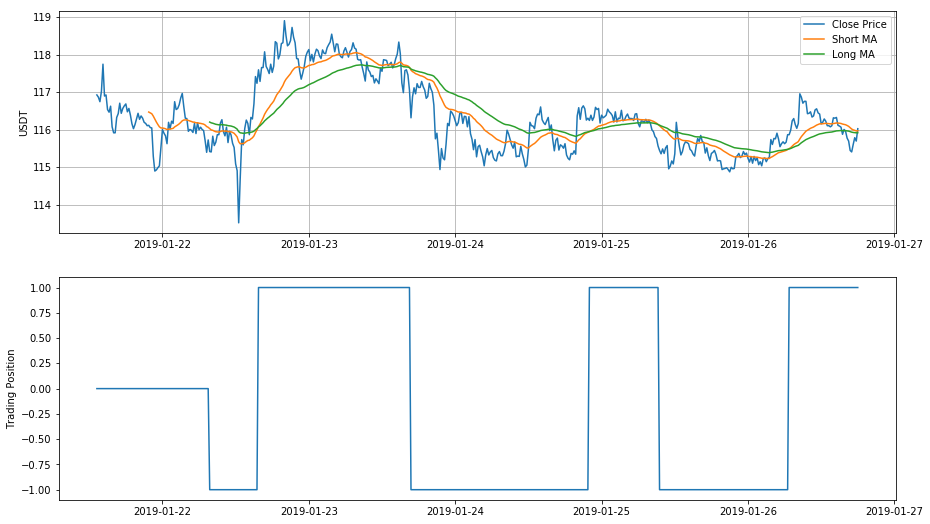

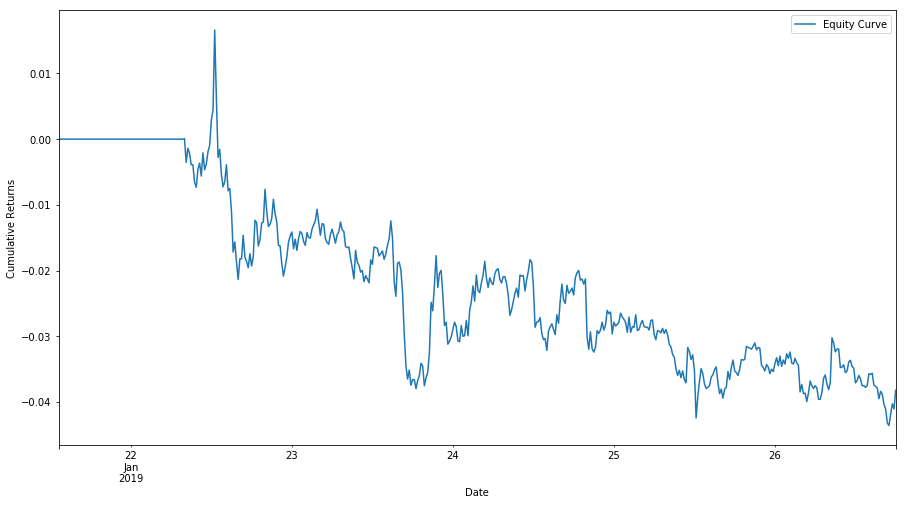

Last 500 poistions taken for: ETHUSDT


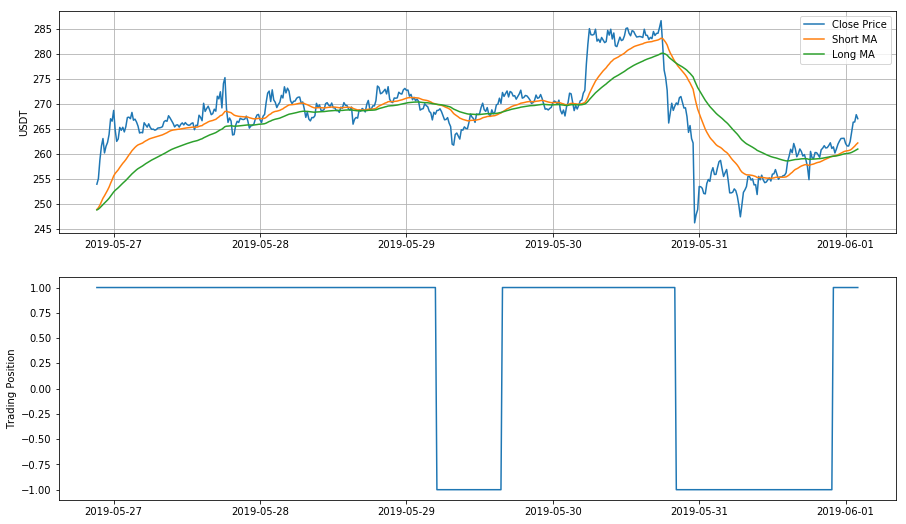

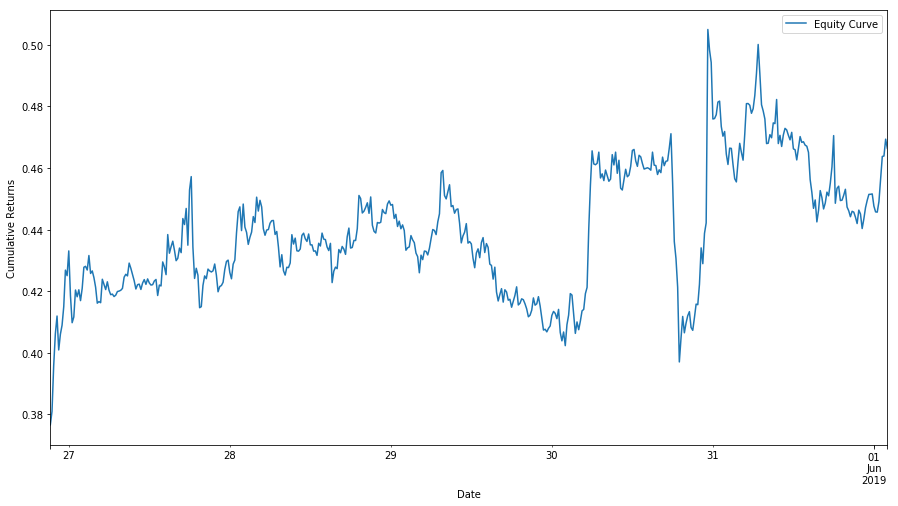

Equity Curve for the whole date range for: ETHUSDT


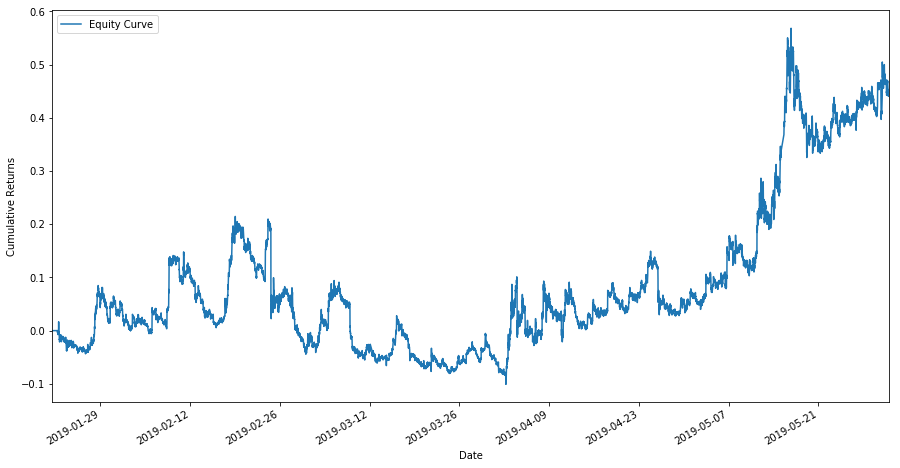

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for XRPUSDT
[BEST] Lead(15) / Lag(35)

From 2019-03-14 11:30:00 to 2019-06-01 02:14:59.999 (79 days)

Total number of trades: 441
Avg. trades per day: 5.58
Profit/Loss [Log Return]: 15.52%
Profit/Loss [Simple Return]: 16.79%
Maximum Gain: 32.9%
Maximum Drawdown: -10.68%
Annualised Sharpe Ratio: 0.79343

First 500 poistions taken for: XRPUSDT


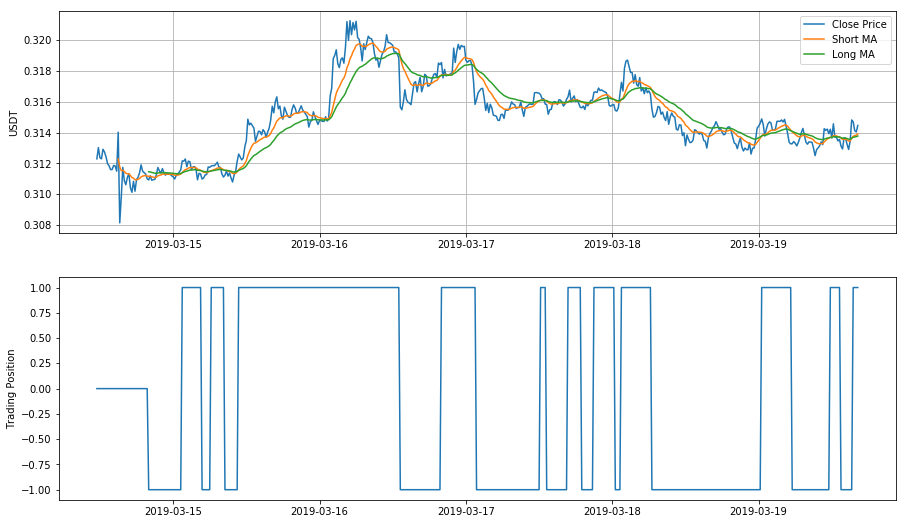

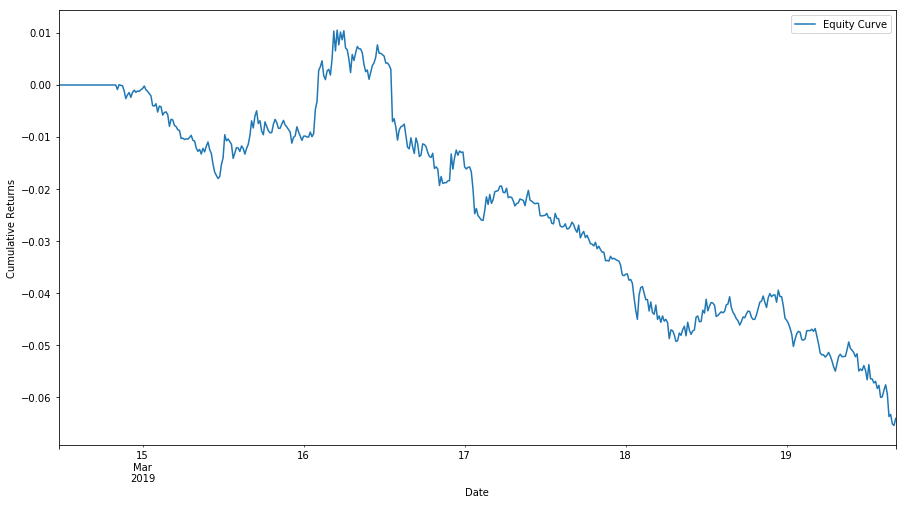

Last 500 poistions taken for: XRPUSDT


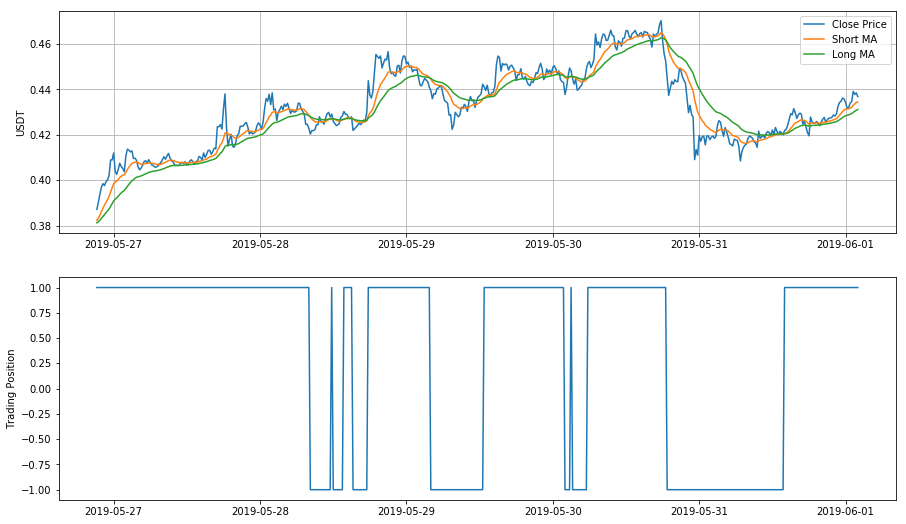

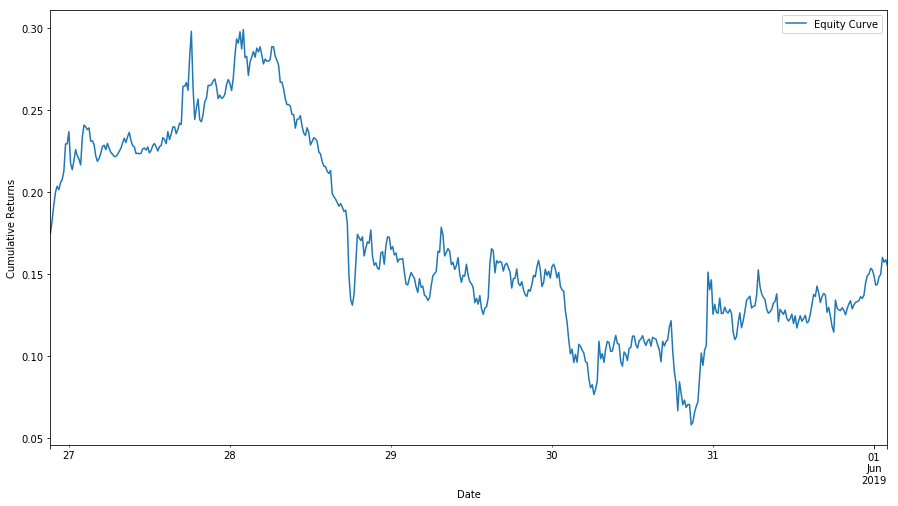

Equity Curve for the whole date range for: XRPUSDT


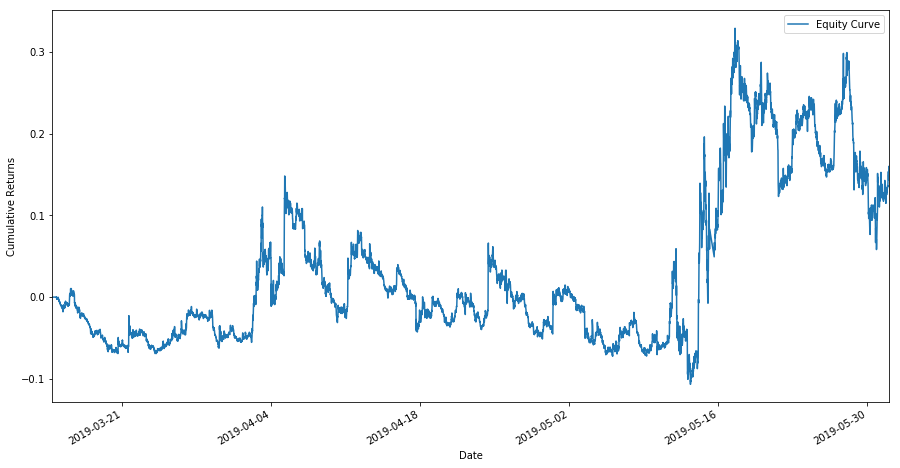

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for LTCUSDT
[BEST] Lead(5) / Lag(50)

From 2019-02-14 02:15:00 to 2019-06-01 02:14:59.999 (107 days)

Total number of trades: 753
Avg. trades per day: 7.04
Profit/Loss [Log Return]: -43.81%
Profit/Loss [Simple Return]: -35.48%
Maximum Gain: 12.32%
Maximum Drawdown: -68.86%
Annualised Sharpe Ratio: -1.378328

First 500 poistions taken for: LTCUSDT


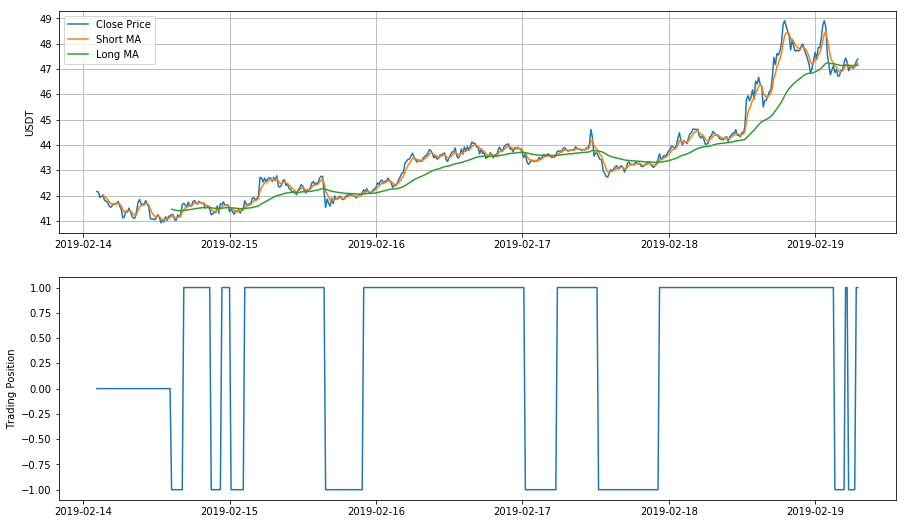

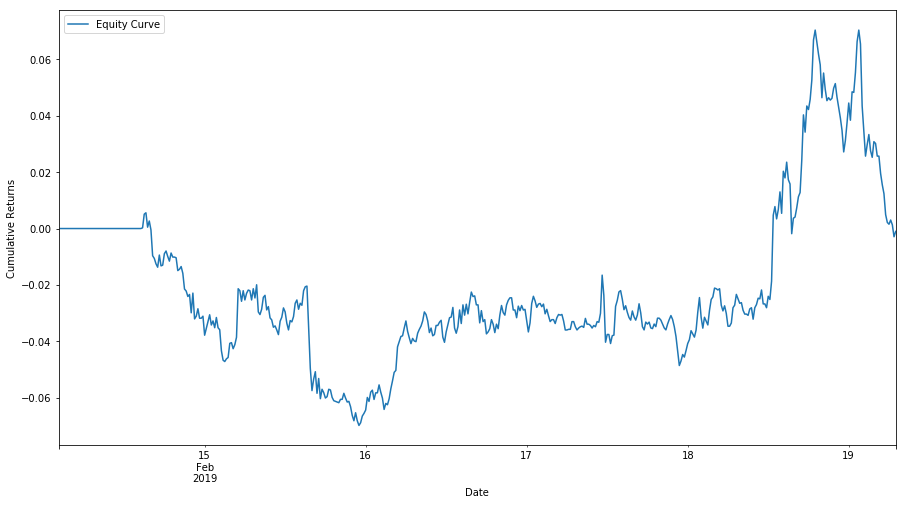

Last 500 poistions taken for: LTCUSDT


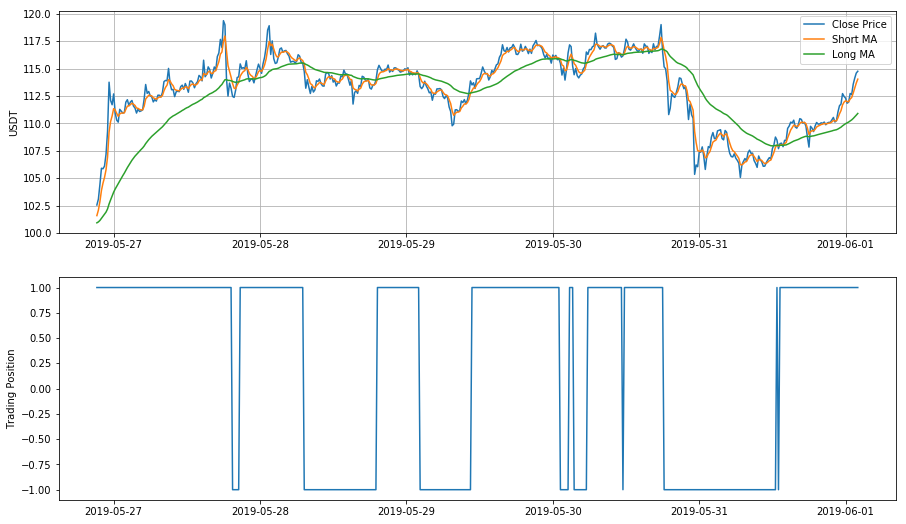

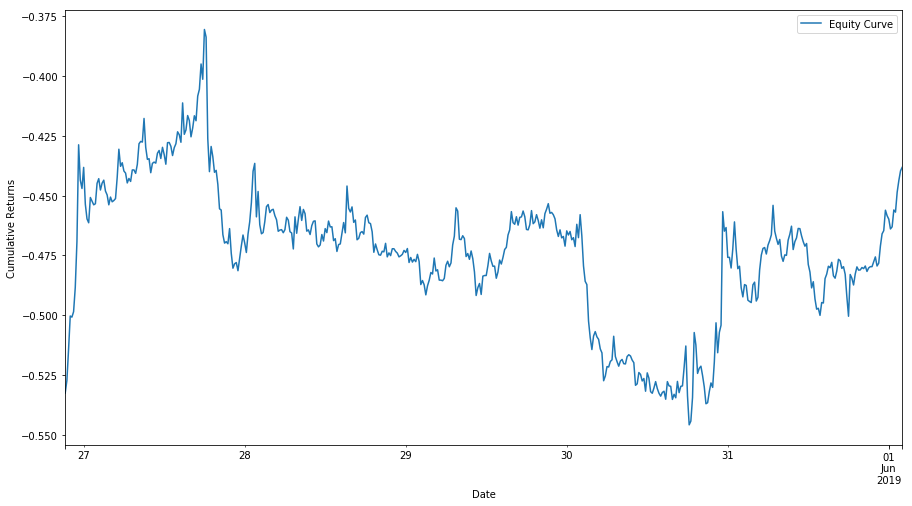

Equity Curve for the whole date range for: LTCUSDT


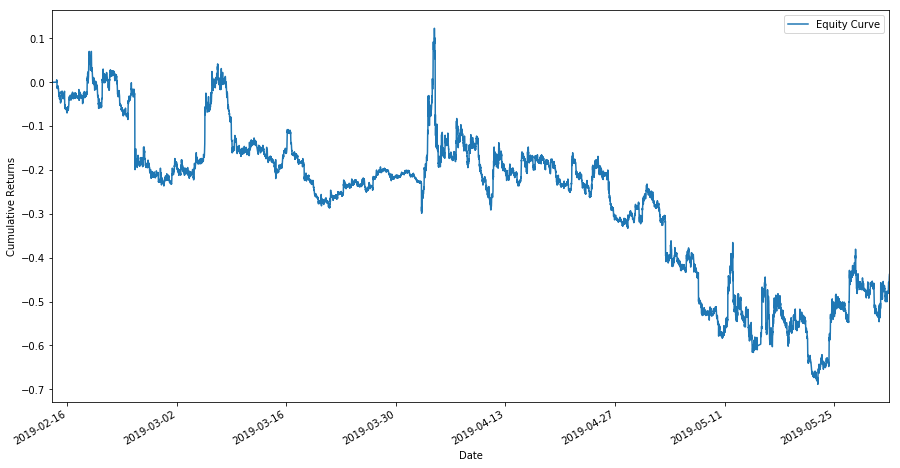

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for EOSUSDT
[BEST] Lead(30) / Lag(35)

From 2019-03-19 06:00:00 to 2019-06-01 02:14:59.999 (74 days)

Total number of trades: 305
Avg. trades per day: 4.12
Profit/Loss [Log Return]: 26.54%
Profit/Loss [Simple Return]: 30.4%
Maximum Gain: 35.67%
Maximum Drawdown: -7.63%
Annualised Sharpe Ratio: 1.30371

First 500 poistions taken for: EOSUSDT


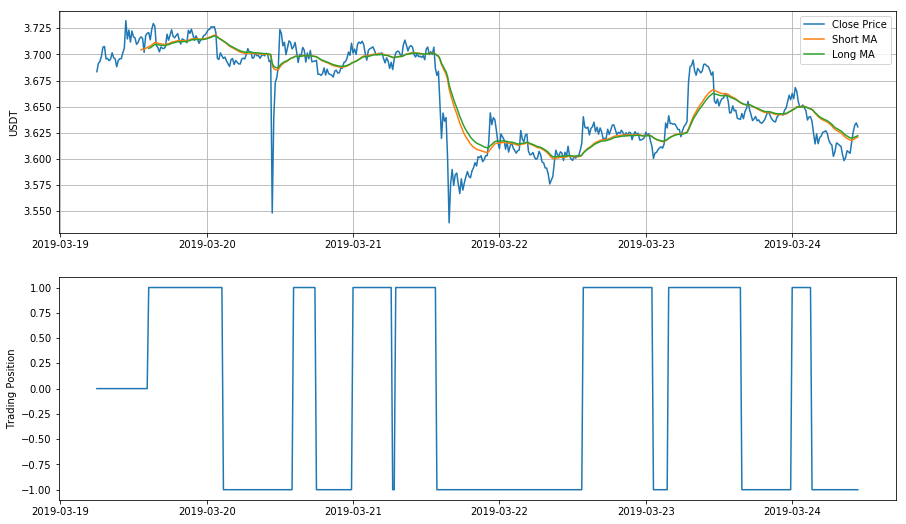

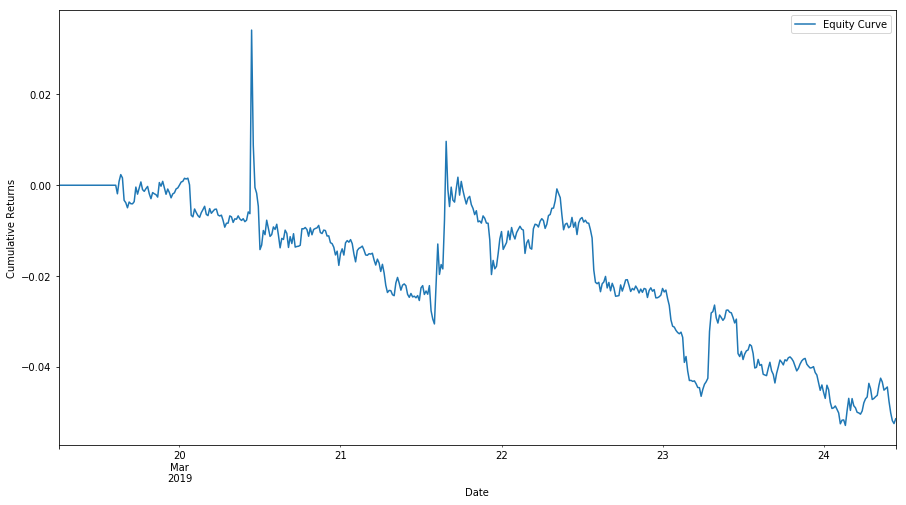

Last 500 poistions taken for: EOSUSDT


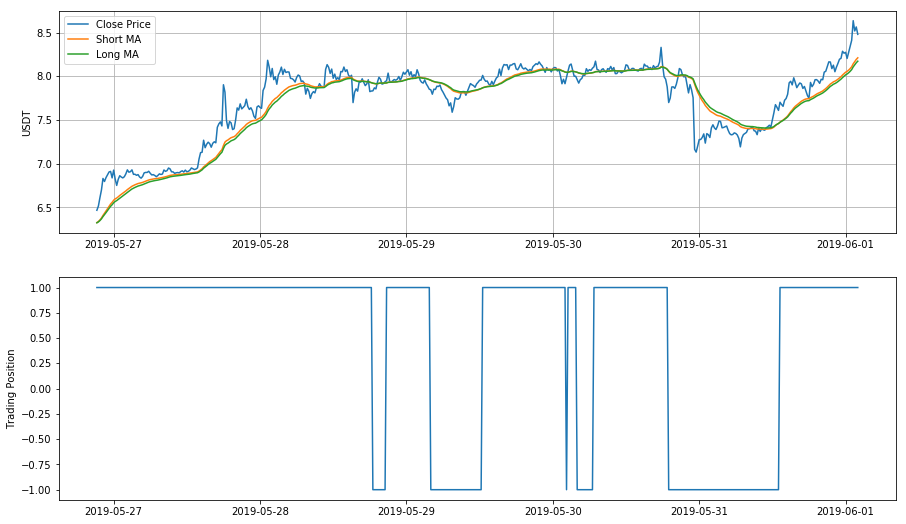

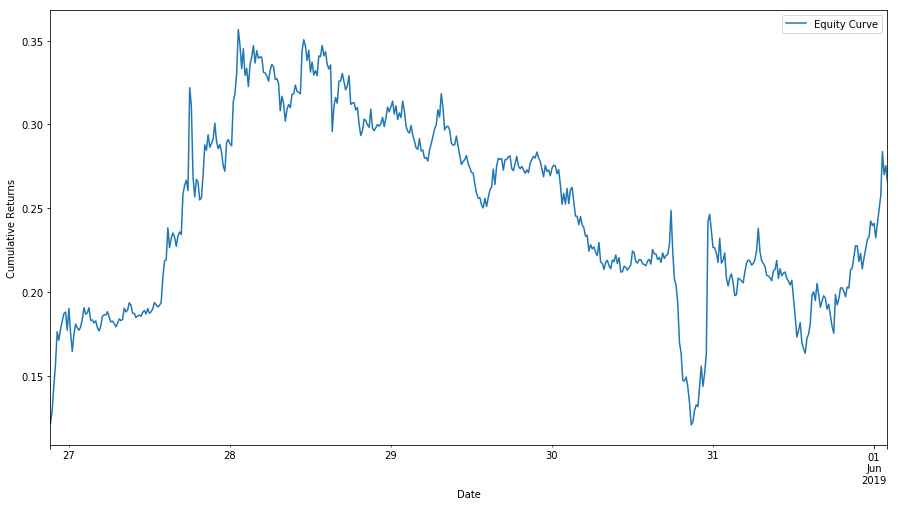

Equity Curve for the whole date range for: EOSUSDT


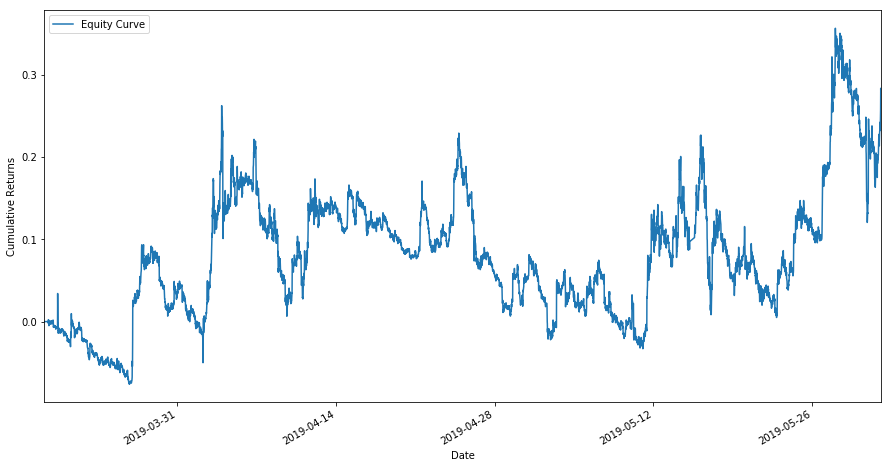

-------------------------------END--------------------------------------------------------
Tuning EMA strategy using brute force for XLMUSDT
[BEST] Lead(20) / Lag(35)

From 2019-03-19 21:15:00 to 2019-06-01 02:14:59.999 (73 days)

Total number of trades: 276
Avg. trades per day: 3.78
Profit/Loss [Log Return]: 34.06%
Profit/Loss [Simple Return]: 40.58%
Maximum Gain: 48.4%
Maximum Drawdown: -1.27%
Annualised Sharpe Ratio: 1.664968

First 500 poistions taken for: XLMUSDT


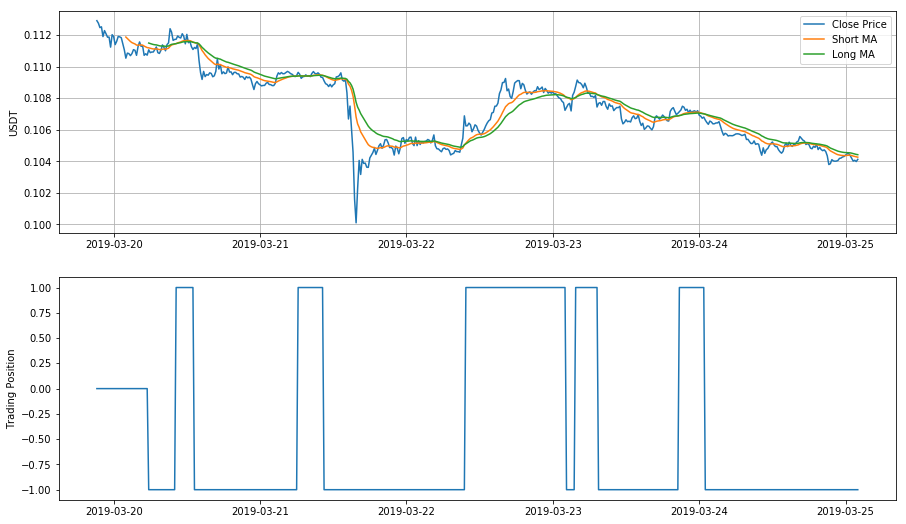

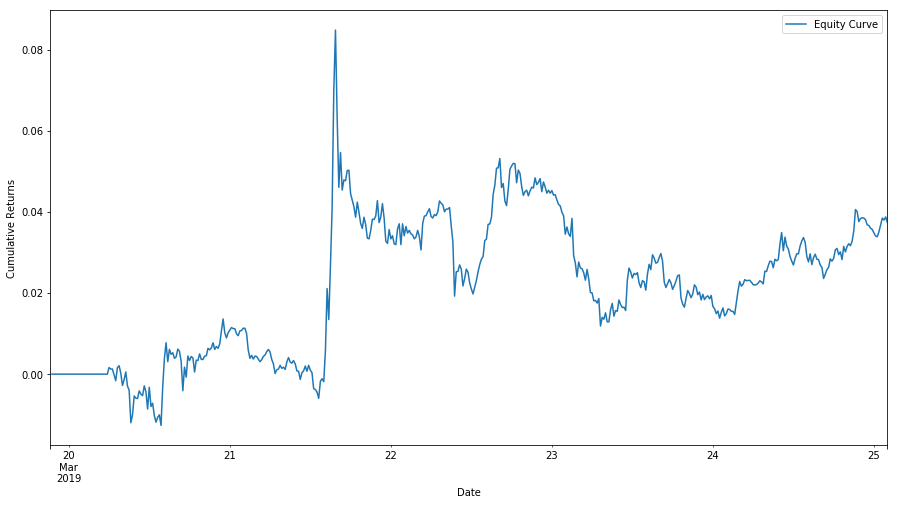

Last 500 poistions taken for: XLMUSDT


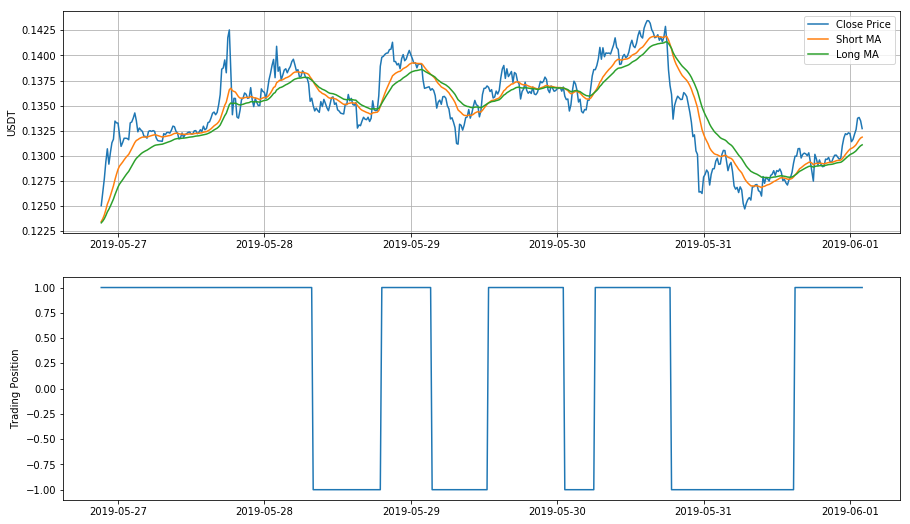

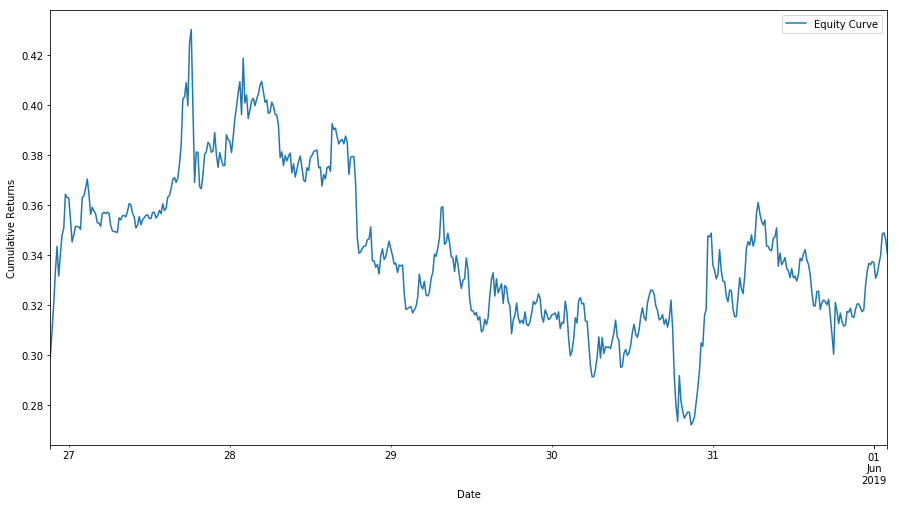

Equity Curve for the whole date range for: XLMUSDT


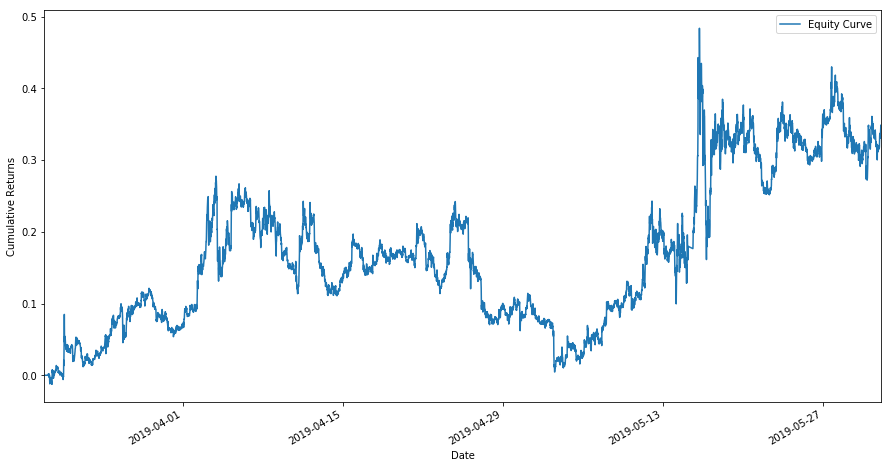

-------------------------------END--------------------------------------------------------


In [7]:
##################################################################
# Exponential Moving Average Crossover Strategy (BASELINE MODEL)
##################################################################

# we only show the first n and last n when plotting the positions 
# as the there are many points since we are using the 15m interval
position_plot_n = 500

# create a new instance for moving average strategy 
macrossover = MACrossoverAlgo()

# tune ema crossover method ('brute force method')
# for all the pairs found in the dataset (in sample)
# we are tuning on the profit and loss parameter 
for key, value in insample_data.items():
        
    # print the pair which is being tuned 
    print("Tuning EMA strategy using brute force for {}".format(key))

    # make copy of dataframe 
    current_pair = insample_data[key].copy()

    # setup initial values 
    best_lead = 0
    best_lag = 0
    best_pl = -float("inf") # set initial profit/loss to inf 
    
    # loop to try different windows for both lead and lag windows
    for i in range(5, 50, 5):     # lead window (steps of 5)
        for j in range(20, 80, 5): # lag window  (steps of 5)

            # lead window must be shorter than the lag window 
            if j > i:
                    
                # note there are also some traders which use EMA for lead and SMA for lag window 
                # this MACrossoverAlgo can be used to test this strategy too, as it accepts the 
                # type of moving average to use 'ema' or 'sma', in our case we will use 'ema' for both
                macrossover.gen_features(data=current_pair,
                                         lead="ema", # we will use EMA moving average type for lead 
                                         lead_t=i,   # set window for short/lead 
                                         lag="ema",  # we will use EMA moving average type for lead 
                                         lag_t=j)    # set window for long/lag

                # generates positions based on crossover 
                # a value of '1' indicates a long position, while a value of '-1' indicates a short position 
                macrossover.gen_positions(data=current_pair)

                # evaluate positions by calculating profit and loss 
                macrossover.evaluate(data=current_pair, trading_fee=trading_fee)

                # check if we found a new best 
                if current_pair.cum_pl.iloc[-1] > best_pl:
                    best_lead = i
                    best_lag = j
                    best_pl = current_pair.cum_pl.iloc[-1]
    
    # once we found the best parameters 
    # test on the test set 
    current_pair = outsample_data[key].copy()

    # show plots for best  
    macrossover.gen_features(data=current_pair,
                             lead="ema",         # we will use EMA moving average type for lead 
                             lead_t=best_lead,   # set window for short/lead 
                             lag="ema",          # we will use EMA moving average type for lead 
                             lag_t=best_lag)     # set window for long/
        
    # print statistics for strategy 
    macrossover.gen_positions(data=current_pair)
    macrossover.evaluate(data=current_pair, trading_fee=trading_fee) 

    # print best windows 
    print("[BEST] Lead({}) / Lag({})\n".format(best_lead, best_lag))
    
    # print performance
    macrossover.stats_perf(data=current_pair)
    
    # set open time as index for plots
    current_pair.set_index("open_time", inplace=True)
    # for the position plots we only show the first and last 500
    print("\nFirst 500 poistions taken for: {}".format(key))
    macrossover.plot_pos(data=current_pair.head(position_plot_n))
    macrossover.plot_perf(data=current_pair.head(position_plot_n))

    print("Last 500 poistions taken for: {}".format(key))
    macrossover.plot_pos(data=current_pair.tail(position_plot_n))
    macrossover.plot_perf(data=current_pair.tail(position_plot_n))

    # plot performance for the whole range
    print("Equity Curve for the whole date range for: {}".format(key))
    macrossover.plot_perf(data=current_pair)
    
    print("-------------------------------END--------------------------------------------------------")